In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [57]:
# Analysis and Visualization
total_cases = df_merged.shape[0]
total_deaths = df_merged[df_merged["Status"] == "Death"].shape[0]
total_cured = df_merged[df_merged["Status"] == "Cured"].shape[0]

# Get status counts for visualization
status_counts = df_merged["Status"].value_counts()

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_14332\3287460200.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_14332\3287460200.py:4: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



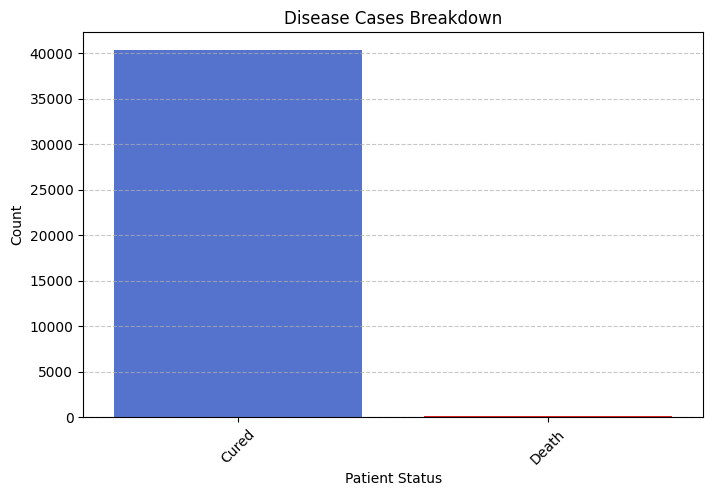

In [58]:
# Matplotlib Visualization - Bar Chart
plt.figure(figsize=(8, 5))
colors = ["royalblue", "red", "green"]
sns.barplot(x=status_counts.index, y=status_counts.values, palette=colors)
plt.xlabel("Patient Status")
plt.ylabel("Count")
plt.title("Disease Cases Breakdown")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [59]:
# Plotly Interactive Visualization - Pie Chart
fig = px.pie(
    names=status_counts.index,
    values=status_counts.values,
    title="Proportion of Patient Status",
    color=status_counts.index,
    color_discrete_map={"Cured": "green", "Death": "red", "Other": "royalblue"},
    hole=0.3
)
fig.update_traces(textinfo="percent+label", pull=[0.1 if x == "Death" else 0 for x in status_counts.index])
fig.show()

In [60]:
# Plotly Bar Chart for Total Cases
total_counts = pd.DataFrame({"Category": ["Total Cases", "Total Deaths", "Total Cured"],
                             "Count": [total_cases, total_deaths, total_cured]})
fig_total = px.bar(
    total_counts,
    x="Category",
    y="Count",
    title="Total Cases, Deaths, and Cured Patients",
    color="Category",
    color_discrete_map={"Total Cases": "blue", "Total Deaths": "red", "Total Cured": "green"}
)
fig_total.show()

In [61]:
# Determine the number of patients per State
state_counts = df_merged["State"].value_counts()
fig_state = px.bar(
    x=state_counts.index, y=state_counts.values,
    title="Number of Patients per State",
    labels={"x": "State", "y": "Count"},
    color=state_counts.index
)
fig_state.show()


In [62]:
# Determine which age group was worst hit
df_merged["Age Group"] = pd.cut(df_merged["Age"], bins=[0, 18, 35, 50, 65, 100],
                                 labels=["0-18", "19-35", "36-50", "51-65", "66+"])
age_group_counts = df_merged["Age Group"].value_counts()
fig_age = px.bar(
    x=age_group_counts.index, y=age_group_counts.values,
    title="Worst Hit Age Group",
    labels={"x": "Age Group", "y": "Count"},
    color=age_group_counts.index
)
fig_age.show()

In [63]:
# Determine which age group has the highest deaths
age_death_counts = df_merged[df_merged["Status"] == "Death"]["Age Group"].value_counts()
fig_age_death = px.bar(
    x=age_death_counts.index, y=age_death_counts.values,
    title="Age Group with Highest Deaths",
    labels={"x": "Age Group", "y": "Death Count"},
    color=age_death_counts.index
)
fig_age_death.show()

In [64]:
# Considering the population distribution
fig_population = px.treemap(
    df_merged,
    path=["State"],
    values="Population_2022",
    title="Population Distribution by State",
    color="Population_2022",
    color_continuous_scale="Viridis"
)
fig_population.show()

In [65]:
# State with the highest outbreak cases
highest_cases_state = state_counts.idxmax()
lowest_cases_state = state_counts.idxmin()

# Treemap for cases per state
fig_cases = px.treemap(
    df_merged,
    path=["State"],
    values="Case_ID",
    title="Outbreak Cases Per State",
    color="Case_ID",
    color_continuous_scale="Blues"
)
fig_cases.show()

In [66]:
# State with the highest death rate in 2022
death_2022 = df_merged[(df_merged["Status"] == "Death") & (df_merged["Year"] == 2022)]
fig_death_sunburst = px.sunburst(
    death_2022,
    path=["State"],
    values="Case_ID",
    title="State with Highest Death Rate in 2022",
    color="Case_ID",
    color_continuous_scale="Reds"
)
fig_death_sunburst.show()

In [67]:
# Financial Analysis
funds_available = 500000000
cost_per_patient = 8950
total_patients_2024 = df_merged[df_merged["Year"] == 2024].shape[0]
amount_spent_2024 = total_patients_2024 * cost_per_patient
remaining_funds = funds_available - amount_spent_2024

In [68]:


print("Analysis and visualization completed.")
print(f"Total Cases: {total_cases}")
print(f"Total Deaths: {total_deaths}")
print(f"Total Cured: {total_cured}")
print(f"State with Highest Cases: {highest_cases_state}")
print(f"State with Lowest Cases: {lowest_cases_state}")
print(f"Amount Spent on Treatment in 2024: ₦{amount_spent_2024}")
print(f"Remaining NGO Funds: ₦{remaining_funds}")


Analysis and visualization completed.
Total Cases: 40422
Total Deaths: 129
Total Cured: 40293
State with Highest Cases: Ekiti
State with Lowest Cases: Lagos
Amount Spent on Treatment in 2024: ₦120592300
Remaining NGO Funds: ₦379407700
